In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from timeit import default_timer

In [13]:
def fn(x):
    return (x + x * x + x * x * x) * x

x = np.random.rand(100, 100).astype(dtype="float32")
fn(x)

%timeit -n100 fn(x)

11.9 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
import jax
import jax.numpy as jnp

print(jax.devices()) # Check which device is being used for computation.

/opt/homebrew/Caskroom/mambaforge/base/envs/ai/lib/python3.9/site-packages/jax/_src/lib/__init__.py:34: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [15]:
x_jnp = jnp.array(x)
fn(x_jnp)

%timeit -n100 fn(x_jnp)

25.2 µs ± 377 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
jax_fn = jax.jit(fn)
jax_fn(x) # Run it once to compile the code to JIT form.
x_jnp = jnp.array(x)

%timeit -n100 jax_fn(x_jnp)

4.06 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print("Jax (JIT) Code:")
print(jax.make_jaxpr(jax_fn)(x))

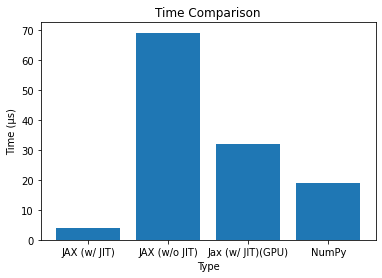

In [17]:
plt.bar(["JAX (w/ JIT)", "JAX (w/o JIT)", "Jax (w/ JIT)(GPU)", "NumPy"], [4, 69, 32, 19])
plt.title("Time Comparison")
plt.xlabel("Type")
plt.ylabel("Time (µs)")
plt.show()